In [1]:
# Import image processing libraries
from scipy import ndimage

import skimage
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
def save_image(img, name):
    # Normalize the image to [0 - 255] before saving it
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    cv2.imwrite(name, norm_image)

# black for borders, truncate to ignore gray image
def truncate_invert(img):
    return -1 * np.where(img > 1, 1, np.where(img < 0, 0, img))

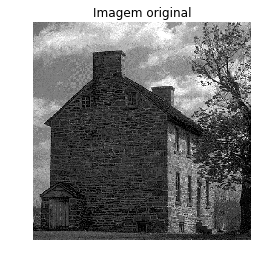

In [3]:
# Load some images (all the examples will use this image)

img = cv2.imread("house.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img / 255

plt.rcParams["figure.figsize"] = (8,4)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

# 1.1 Filtragem em domínio espacial

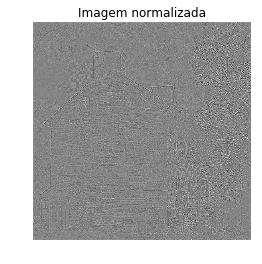

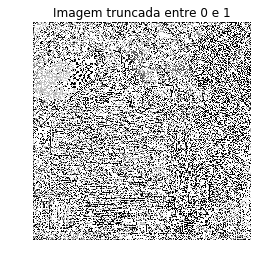

In [4]:
# Exercise 1.1 a)

h1 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0],
])

new_image = ndimage.convolve(img, h1, mode='constant')

new_image_clip = truncate_invert(new_image)

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem normalizada"), plt.axis('off')
plt.show()

plt.imshow(new_image_clip, cmap=plt.cm.gray)
plt.title("Imagem truncada entre 0 e 1"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio1a.png')
save_image(new_image_clip, 'results/exercicio1aclipada.png')

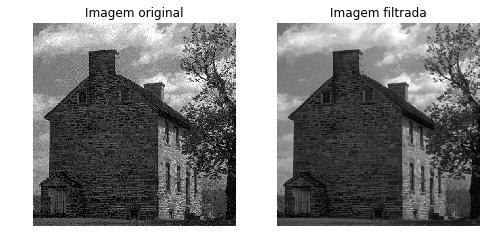

In [5]:
# Exercise 1.1 b)

# Separate the original filter
h2 = np.array([1,4,6,4,1])
h2 = h2 / h2.sum()

# FIlter the image, filter as column and line
new_image = (ndimage.convolve(img, h2.reshape(1,-1), mode='constant') +
             ndimage.convolve(img, h2.reshape(-1,1), mode='constant'))

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio1b.png')

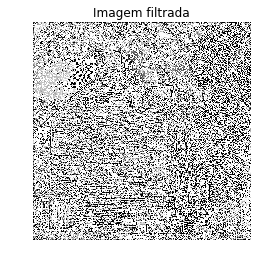

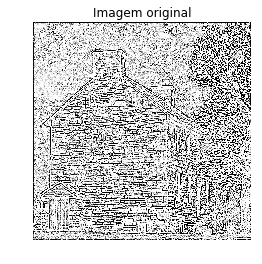

In [6]:
gaussian_image = (ndimage.convolve(img, h2.reshape(1,-1), mode='constant') +
             ndimage.convolve(img, h2.reshape(-1,1), mode='constant'))

gaussian_image = ndimage.convolve(gaussian_image, h1, mode='constant')
gaussian_image_clip = truncate_invert(gaussian_image)

new_image = ndimage.convolve(img, h1, mode='constant')
new_image_clip = truncate_invert(new_image)

plt.imshow(new_image_clip, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.savefig('results/exercicio1agaussiano.png')
plt.show()

plt.imshow(gaussian_image_clip, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

save_image(gaussian_image_clip, 'results/exercicio1agaussiano.png')

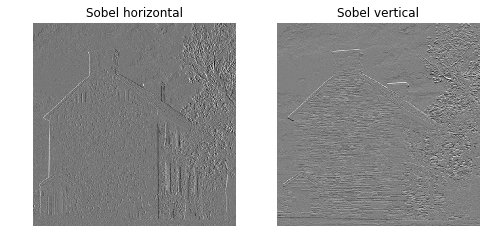

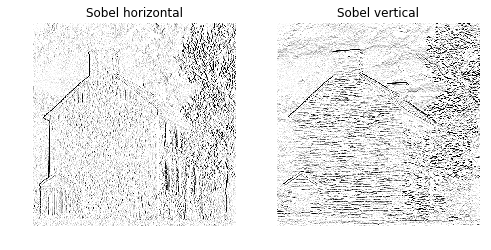

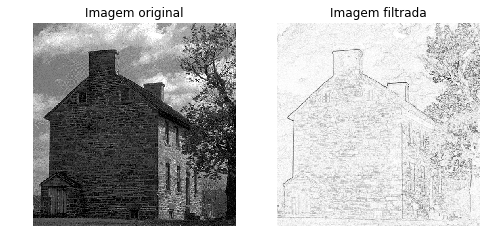

In [7]:
# Exercise 1.1 c)

h3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0 ,1]
])

h4 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]
)

new_image_vertical = ndimage.convolve(img, h3, mode='constant')
new_image_horizontal = ndimage.convolve(img, h4, mode='constant')


new_image_vertical_clip = truncate_invert(new_image_vertical)
new_image_horizontal_clip = truncate_invert(new_image_horizontal)


plt.subplot(121), plt.imshow(new_image_vertical, cmap=plt.cm.gray)
plt.title("Sobel horizontal"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image_horizontal, cmap=plt.cm.gray)
plt.title("Sobel vertical"), plt.axis('off')
plt.savefig('results/sobel.png')
plt.show()

plt.subplot(121), plt.imshow(new_image_vertical_clip, cmap=plt.cm.gray)
plt.title("Sobel horizontal"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image_horizontal_clip, cmap=plt.cm.gray)
plt.title("Sobel vertical"), plt.axis('off')
plt.savefig('results/sobelclip.png')
plt.show()


# Sobel combination of the two filters (vertical and horizontal)
new_image = np.sqrt(new_image_vertical ** 2 + new_image_horizontal ** 2)
new_image = new_image * -1

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio1c.png')

# 1.2 Filtragem em dominio de frequencia

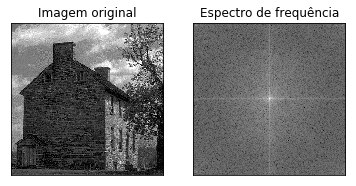

In [8]:
# Fast Fouries Tranform in 2D
fft_image = np.fft.fft2(img)

# Shift the frequency 0 to the center
shift_image = np.fft.fftshift(fft_image)

# Get the frequency spectrum
magnitude_spectrum = np.log(np.abs(shift_image))

save_image(magnitude_spectrum, 'results/espectro.png')
plt.rcParams["figure.figsize"] = (6,12)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Espectro de frequência'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# Helper function to calcultate distances to do the gaussian filter from the center
def calc_distances(shape):
    # calculate the center point
    rows, cols = shape
    mid_row, mid_col = rows // 2 + rows % 2, cols // 2 + cols % 2
    
    # put the indices distances from the middle
    indices = np.indices(shape)
    indices[0] = abs(indices[0] - mid_row)
    indices[1] = abs(indices[1] - mid_col)
    
    # calculate the distances
    return np.sqrt(indices[0] ** 2 + indices[1] ** 2)

# Use this distaces matrix in all frequency filters
distances = calc_distances(shift_image.shape)

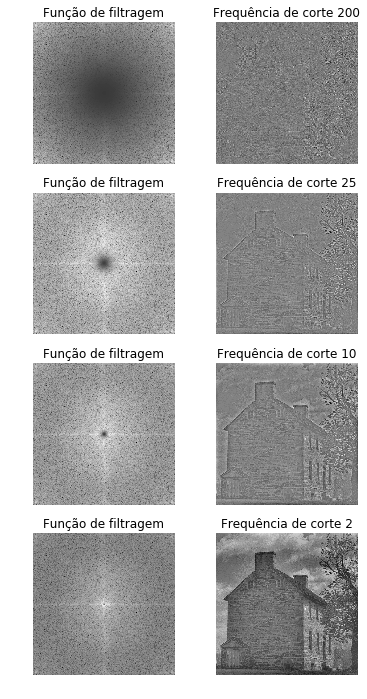

In [10]:
def gaussian_high_pass_mask(distances, cut):
    return 1 - np.exp(-(distances ** 2) / (2 * cut ** 2))

counter = 1
for i in [200,25,10,2]:
    mask = gaussian_high_pass_mask(distances, i)
    
    shift_new_image = shift_image * mask
    shift_new_image = np.fft.ifftshift(shift_new_image)
    new_image = np.fft.ifft2(shift_new_image).real
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(4,2,counter), plt.imshow(magnitude_spectrum*function_mask, cmap = 'gray')
    plt.title('Função de filtragem'), plt.axis('off')
    
    plt.subplot(4,2,counter + 1), plt.imshow(new_image, cmap = 'gray')
    plt.title('Frequência de corte {}'.format(i)), plt.axis('off')
    
    counter += 2
plt.savefig('results/exercicio2passa_alta.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

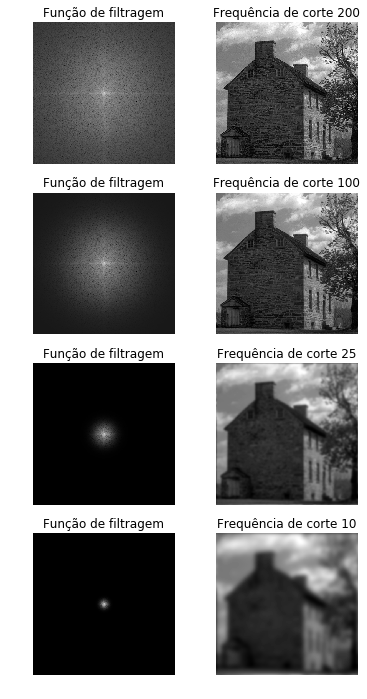

In [11]:
def gaussian_low_pass_mask(distances, cut):
    return np.exp(-(distances ** 2) / (2 * cut ** 2))

counter = 1
for i in [200,100,25,10]:
    mask = gaussian_low_pass_mask(distances, i)
    
    shift_new_image = shift_image * mask
    shift_new_image = np.fft.ifftshift(shift_new_image)
    new_image = np.fft.ifft2(shift_new_image).real
    
    function_mask = np.log(np.abs(mask) + 1)
    plt.subplot(4,2,counter), plt.imshow(magnitude_spectrum*function_mask, cmap = 'gray')
    plt.title('Função de filtragem'), plt.axis('off')
    
    plt.subplot(4,2,counter + 1), plt.imshow(new_image, cmap = 'gray')
    plt.title('Frequência de corte {}'.format(i)), plt.axis('off')
    
    counter += 2
plt.savefig('results/exercicio2passa_baixa.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

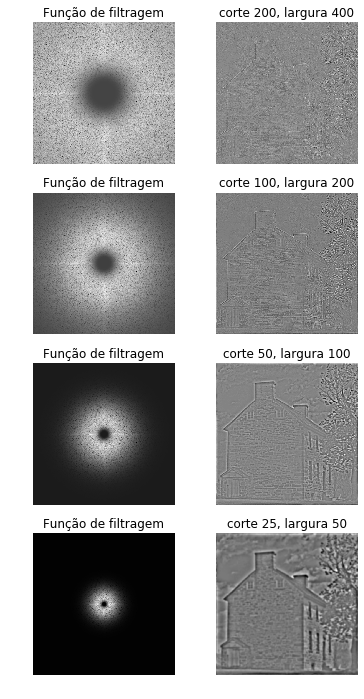

In [12]:
def gaussian_band_pass_mask(distances, cut, width):
    return np.exp(-(((distances ** 2 - cut ** 2) / (width * distances)) ** 2))

counter = 1
for i in [200,100,50,25]:
    mask = gaussian_band_pass_mask(distances, i, i * 2)
    
    shift_new_image = shift_image * mask
    shift_new_image = np.fft.ifftshift(shift_new_image)
    new_image = np.fft.ifft2(shift_new_image).real
    
    plt.subplot(4,2,counter), plt.imshow(magnitude_spectrum*mask, cmap = 'gray')
    plt.title('Função de filtragem'), plt.axis('off')
    
    plt.subplot(4,2,counter + 1), plt.imshow(new_image, cmap = 'gray')
    plt.title('corte {}, largura {}'.format(i, i * 2)), plt.axis('off')
    
    counter += 2
plt.savefig('results/exercicio2passa_faixa.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

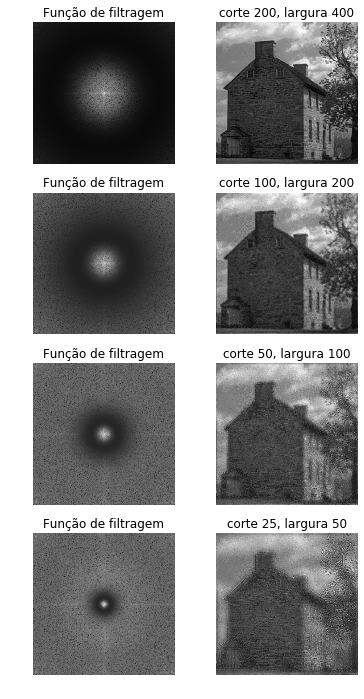

In [13]:
def gaussian_band_reject_mask(distances, cut, width):
    return 1 - np.exp(-(((distances ** 2 - cut ** 2) / (width * distances)) ** 2))

counter = 1
for i in [200,100,50,25]:
    mask = gaussian_band_reject_mask(distances, i, i * 2)
    
    shift_new_image = shift_image * mask
    shift_new_image = np.fft.ifftshift(shift_new_image)
    new_image = np.fft.ifft2(shift_new_image).real
    
    plt.subplot(4,2,counter), plt.imshow(magnitude_spectrum*mask, cmap = 'gray')
    plt.title('Função de filtragem'), plt.axis('off')
    
    plt.subplot(4,2,counter + 1), plt.imshow(new_image, cmap = 'gray')
    plt.title('corte {}, largura {}'.format(i, i * 2)), plt.axis('off')
    
    counter += 2
plt.savefig('results/exercicio2rejeita_faixa.png', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()